<a href="https://colab.research.google.com/github/yeahginny/Kaggle/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [ ]:
train.describe() #평균이 결국 생존율입니다.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train.corr()

<ipython-input-3-0bc27f030cd9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [ ]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
#세부적으로 살펴보면:

#[A-Za-z]: 대문자 또는 소문자 중 어떤 영문자라도 해당됩니다.
#+: 직전에 있는 문자가 하나 이상이라는 것을 의미합니다. 따라서, [A-Za-z]+는 하나 이상의 연속된 영문자를 의미합니다.
#(): 이 괄호는 그룹을 만드는 역할을 합니다. 괄호 안에 있는 것을 하나의 단위로 묶어줍니다. 이는 매칭된 결과를 개별적으로 참조하거나 저장할 때 유용합니다.
#\.: 점(.)을 의미합니다. 정규 표현식에서 점(.)은 모든 문자를 의미하는 특수 문자이기 때문에 실제 점을 나타내기 위해선 \로 이스케이프 해야 합니다.
#따라서 이 정규표현식은 "John.", "A.", "abc." 등과 같은 문자열과 매치되는 패턴을 의미합니다.

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [ ]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: Title, dtype: int64

In [ ]:
train['Title'] = train['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

train['Title'] = train['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
train['Title'] = train['Title'].replace('Mlle', 'Miss')
train['Title'] = train['Title'].replace('Ms', 'Miss')
train['Title'] = train['Title'].replace('Mme', 'Mrs')

In [ ]:
train['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Other      27
Name: Title, dtype: int64

In [ ]:
train['Title_label'] = train['Title'].astype('category').cat.codes

train[['Title','Title_label']]

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Miss,1
3,Mrs,3
4,Mr,2
...,...,...
886,Other,4
887,Miss,1
888,Miss,1
889,Mr,2


In [ ]:
test['Title'] = test['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

test['Title'] = test['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona', 'Mlle', 'Ms', 'Mme'], 'Other')
test['Title'] = test['Title'].replace('Mlle', 'Miss')
test['Title'] = test['Title'].replace('Ms', 'Miss')
test['Title'] = test['Title'].replace('Mme', 'Mrs')

test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Other       7
Name: Title, dtype: int64

In [ ]:
test['Title_label'] = train['Title'].astype('category').cat.codes

test[['Title','Title_label']]

,Title,Title_label
0,Mr,2
1,Mrs,3
2,Mr,1
3,Mr,3
4,Mrs,2
...,...,...
413,Mr,2
414,Other,2
415,Mr,3
416,Mr,3


In [ ]:
전체데이터 = [train, test]

In [ ]:
for 데이터 in 전체데이터:
    데이터['Title'] = 데이터['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [ ]:
mapping_data = {"Mr": 0, "Miss": 1, "Mrs": 2, "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3, "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for 데이터 in 전체데이터:
    데이터['Title'] = 데이터['Title'].map(mapping_data)

In [ ]:
# 불필요 데이터 지우기
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [ ]:
# 불필요 데이터 지우기
train.drop('Title', axis=1, inplace=True)
test.drop('Title', axis=1, inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title_label  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [ ]:
train["Age"].fillna(train.groupby("Sex")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("median"), inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Title_label  891 non-null    int8   
dtypes: float64(2), int64(5), int8(1), object(4)
memory usage: 77.6+ KB


In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,2
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,3
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


In [ ]:
for 데이터 in 전체데이터:
    데이터.loc[ 데이터['Age'] <= 16, 'Age'] = 0
    데이터.loc[(데이터['Age'] > 16) & (데이터['Age'] <= 26), 'Age'] = 1
    데이터.loc[(데이터['Age'] > 26) & (데이터['Age'] <= 36), 'Age'] = 2
    데이터.loc[(데이터['Age'] > 36) & (데이터['Age'] <= 62), 'Age'] = 3
    데이터.loc[ 데이터['Age'] > 62, 'Age'] = 4

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,1,0,3,male,1.0,1,0,A/5 21171,7.2500,NaN,S,2
1,2,1,1,female,3.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,female,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,2.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,male,2.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title_label
0,892,3,male,2.0,0,0,330911,7.8292,NaN,Q,2
1,893,3,female,3.0,1,0,363272,7.0000,NaN,S,3
2,894,2,male,3.0,0,0,240276,9.6875,NaN,Q,1
3,895,3,male,2.0,0,0,315154,8.6625,NaN,S,3
4,896,3,female,1.0,1,1,3101298,12.2875,NaN,S,2


In [ ]:
for 데이터 in 전체데이터:
    데이터['Fare_bin'] = pd.qcut(train['Fare'], 5)
    데이터['Fare_label'] = 데이터['Fare_bin'].astype('category').cat.codes

In [ ]:
train[['Fare','Fare_bin','Fare_label']]

,Fare,Fare_bin,Fare_label
0,7.2500,"(-0.001, 7.854]",0
1,71.2833,"(39.688, 512.329]",4
2,7.9250,"(7.854, 10.5]",1
3,53.1000,"(39.688, 512.329]",4
4,8.0500,"(7.854, 10.5]",1
...,...,...,...
886,13.0000,"(10.5, 21.679]",2
887,30.0000,"(21.679, 39.688]",3
888,23.4500,"(21.679, 39.688]",3
889,30.0000,"(21.679, 39.688]",3


In [ ]:
test[['Fare','Fare_bin','Fare_label']]

,Fare,Fare_bin,Fare_label
0,7.8292,"(-0.001, 7.854]",0
1,7.0000,"(39.688, 512.329]",4
2,9.6875,"(7.854, 10.5]",1
3,8.6625,"(39.688, 512.329]",4
4,12.2875,"(7.854, 10.5]",1
...,...,...,...
413,8.0500,"(-0.001, 7.854]",0
414,108.9000,"(7.854, 10.5]",1
415,7.2500,"(7.854, 10.5]",1
416,8.0500,"(21.679, 39.688]",3


In [ ]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('Fare', axis=1, inplace=True)
    데이터.drop('Fare_bin', axis=1, inplace=True)

In [ ]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [ ]:
mapping_data = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for 데이터 in 전체데이터:
    데이터['FamilySize'] = 데이터['FamilySize'].map(mapping_data)

In [ ]:
# 불필요 데이터 지우기
for 데이터 in 전체데이터:
    데이터.drop('SibSp', axis=1, inplace=True)
    데이터.drop('Parch', axis=1, inplace=True)

In [ ]:
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].fillna('S')

In [ ]:
mapping_data = {"S": 0, "C": 1, "Q": 2}
for 데이터 in 전체데이터:
    데이터['Embarked'] = 데이터['Embarked'].map(mapping_data)

In [ ]:
test['Sex'] = test['Sex'].astype('category').cat.codes
train['Sex'] = train['Sex'].astype('category').cat.codes

In [ ]:
for 데이터 in 전체데이터:
    데이터.drop('Ticket', axis=1, inplace=True)
    데이터.drop('Cabin', axis=1, inplace=True)
    데이터.drop('PassengerId', axis=1, inplace=True)

In [ ]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,Title_label,Fare_label,FamilySize
0,0,3,1,1.0,0,2,0,0.4
1,1,1,0,3.0,1,3,4,0.4
2,1,3,0,1.0,0,1,1,0.0
3,1,1,0,2.0,0,3,4,0.4
4,0,3,1,2.0,0,2,1,0.0


In [ ]:
test.head()

,Pclass,Sex,Age,Embarked,Title_label,Fare_label,FamilySize
0,3,1,2.0,2,2,0,0.0
1,3,0,3.0,0,3,4,0.4
2,2,1,3.0,2,1,1,0.0
3,3,1,2.0,0,3,4,0.0
4,3,0,1.0,0,2,1,0.8


In [ ]:
train.corr()

,Survived,Pclass,Sex,Age,Embarked,Title_label,Fare_label,FamilySize
Survived,1.000000,-0.338481,-0.543351,-0.072077,0.106811,-0.052471,0.317783,0.016639
Pclass,-0.338481,1.000000,0.131900,-0.286667,0.045702,-0.195910,-0.705206,0.065997
Sex,-0.543351,0.131900,1.000000,0.084630,-0.116569,0.040484,-0.244943,-0.200988
Age,-0.072077,-0.286667,0.084630,1.000000,0.034334,0.447788,0.087896,-0.238659
Embarked,0.106811,0.045702,-0.116569,0.034334,1.000000,-0.081928,-0.089125,-0.080281
Title_label,-0.052471,-0.195910,0.040484,0.447788,-0.081928,1.000000,0.060707,-0.207530
Fare_label,0.317783,-0.705206,-0.244943,0.087896,-0.089125,0.060707,1.000000,0.418125
FamilySize,0.016639,0.065997,-0.200988,-0.238659,-0.080281,-0.207530,0.418125,1.000000


<Axes: >

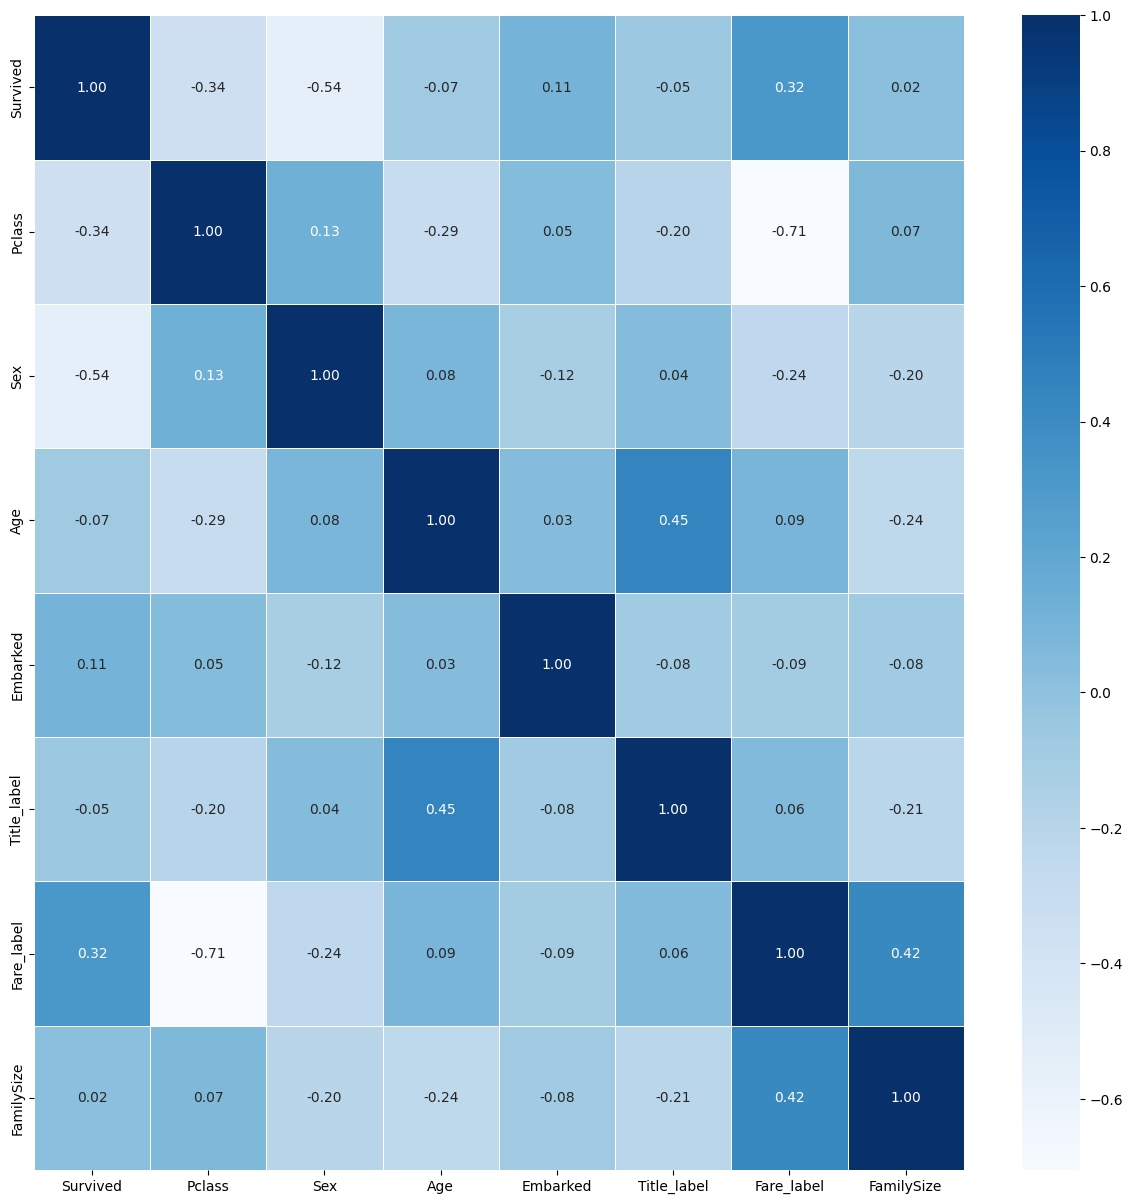

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(data=train.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']

train_data.shape, target.shape

((891, 7), (891,))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

In [ ]:
clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [ ]:
# kNN 점수 확인
round(np.mean(score)*100, 2)

83.39

In [ ]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [ ]:
# decision tree 점수 확인
round(np.mean(score)*100, 2)

81.6

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [ ]:
# Random Forest 점수 확인
round(np.mean(score)*100, 2)

81.48

In [ ]:
clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [ ]:
# Random Forest 점수 확인
round(np.mean(score)*100, 2)

82.04

In [ ]:
clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [ ]:
# Naive Bayes 점수 확인
round(np.mean(score)*100, 2)

78.67

In [ ]:
clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

In [ ]:
round(np.mean(score)*100,2)

83.05

In [ ]:
clf = SVC()
clf.fit(train_data, target)
#test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test)

In [ ]:
test_ori = pd.read_csv('/content/test.csv')

In [ ]:
제출값 = pd.DataFrame({"PassengerId": test_ori["PassengerId"],"Survived": prediction})
제출값.to_csv('titanic_ver_1.csv', index=False)

In [ ]:
제출값 # 영문명으로 변경 필요

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
